## AI Data Lab Data Analysis 

In [46]:
# Import datasets 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
import seaborn as sns
train_ridership = pd.read_csv('train_ridership(in).csv', encoding="latin-1")
weather_data = pd.read_csv("weather_data(1).csv", encoding="latin-1")
weather_data.head()

,Date,Avg temp,total precipitation (in),rain more than 10in,Unnamed: 4
0,1/1/2025,53.95,3.30,0.0,NaN
1,1/8/2025,48.07,0.93,0.0,NaN
2,1/15/2025,51.13,0.29,0.0,NaN
3,1/22/2025,43.08,2.45,0.0,NaN
4,1/29/2025,48.90,1.95,0.0,NaN


In [62]:
import os 
os.chdir('C:/Users/ngair/OneDrive - Emory/Documents/ECON 220')

In [68]:
event_data = pd.read_csv("event data.csv", encoding="latin-1")
event_data.head()

# rename colum event_date to date
event_data = event_data.rename(columns={"Event Date": "Date"})
event_data.head()

,event_name,venue_name,venue_lat,venue_lon,Date,event_end_date,attendance,event_type,week_start
0,Passion 2024,Mercedes-Benz Stadium,33.7553° N,84.4006° W,1/3/2024,1/5/2024,"55,000",Conference (Religious),NaN
1,Discover Boating Atlanta Boat Show,Georgia World Congress Center,33.7587° N,84.3985° W,1/11/2024,1/14/2024,"16,000",Expo,NaN
2,HBCU Culture Homecoming Fest & Battle of the B...,State Farm Arena,33.7573° N,84.3963° W,1/14/2024,1/14/2024,"15,000",Music/Performance,NaN
3,NBA: Atlanta Hawks vs. San Antonio Spurs,State Farm Arena,33.7573° N,84.3963° W,1/15/2024,1/15/2024,"16,203",Sports,NaN
4,NBA: Atlanta Hawks vs. Orlando Magic,State Farm Arena,33.7573° N,84.3963° W,1/17/2024,1/17/2024,"16,000",Sports,NaN


In [48]:
train_ridership.head()

,Date,Station,Total trips,Week_Start
0,1/1/2023,Airport,3998,12/26/2022
1,1/1/2023,Arts Center,1564,12/26/2022
2,1/1/2023,Ashby,726,12/26/2022
3,1/1/2023,Avondale,704,12/26/2022
4,1/1/2023,Bankhead,323,12/26/2022


In [49]:
# Convert train_ridership Date to datetime
train_ridership["Date"] = pd.to_datetime(train_ridership["Date"], errors='coerce')

# Convert weather_data Date to datetime (FIXED)
weather_data["Date"] = pd.to_datetime(weather_data["Date"], errors='coerce')

# Convert event_data Date to datetime
event_data["Date"] = pd.to_datetime(event_data["Date"], errors='coerce')

# Normalize dates (remove time)
train_ridership["Date"] = train_ridership["Date"].dt.normalize()
weather_data["Date"] = weather_data["Date"].dt.normalize()
event_data["Date"] = event_data["Date"].dt.normalize()

print(train_ridership["Date"].dtype)
print(event_data["Date"].dtype)

# Merge
merged = train_ridership.merge(weather_data, on="Date", how="left")


datetime64[ns]
datetime64[ns]


In [71]:
train_ridership["Date"] = train_ridership["Date"].astype(str).str.strip()
train_ridership["Date"] = pd.to_datetime(train_ridership["Date"])
event_data["Date"] = pd.to_datetime(event_data["Date"])
merged = train_ridership.merge(event_data, on="Date", how="left")

In [72]:
merged.head()

,Date,Station,Total trips,Week_Start,latitude,longitude,event_name,venue_name,venue_lat,venue_lon,event_end_date,attendance,event_type,week_start
0,2023-01-01,Airport,3998,12/26/2022,60.321816,24.947361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,Arts Center,1564,12/26/2022,33.789136,-84.387264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01,Ashby,726,12/26/2022,52.747134,-1.471215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,Avondale,704,12/26/2022,33.435598,-112.349602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01,Bankhead,323,12/26/2022,33.772257,-84.428941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
merged = train_ridership.merge(weather_data, on="Date", how="left")
merged

,Date,Station,Total trips,Week_Start,Avg temp,total precipitation (in),rain more than 10in,Unnamed: 4
0,2023-01-01,Airport,3998,12/26/2022,NaN,NaN,NaN,NaN
1,2023-01-01,Arts Center,1564,12/26/2022,NaN,NaN,NaN,NaN
2,2023-01-01,Ashby,726,12/26/2022,NaN,NaN,NaN,NaN
3,2023-01-01,Avondale,704,12/26/2022,NaN,NaN,NaN,NaN
4,2023-01-01,Bankhead,323,12/26/2022,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
36926,2025-08-31,Peachtree Center,13498,8/25/2025,NaN,NaN,NaN,NaN
36927,2025-08-31,Sandy Springs,1155,8/25/2025,NaN,NaN,NaN,NaN
36928,2025-08-31,Vine City,6402,8/25/2025,NaN,NaN,NaN,NaN
36929,2025-08-31,West End,1802,8/25/2025,NaN,NaN,NaN,NaN


In [51]:
geolocator = Nominatim(user_agent="train_mapper")
def get_coordinates(station):
    try:
        location = geolocator.geocode(station)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

In [52]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="train_mapper")

stations = train_ridership['Station'].unique()

coords = {}
for station in stations:
    try:
        location = geolocator.geocode(station)
        if location:
            coords[station] = (location.latitude, location.longitude)
        else:
            coords[station] = (None, None)
    except:
        coords[station] = (None, None)
    time.sleep(1)  # Respect Nominatim's rate limit

# Map coordinates back to the dataframe
train_ridership['latitude'] = train_ridership['Station'].map(lambda x: coords[x][0])
train_ridership['longitude'] = train_ridership['Station'].map(lambda x: coords[x][1])


In [10]:
train_ridership.head()
# Strip spaces and standardize column names
train_ridership.columns = train_ridership.columns.str.strip().str.lower()

# Now 'week_start' is the standardized name
train_ridership['week_start'] = pd.to_datetime(train_ridership['week_start'])
# Strip spaces and standardize column names
train_ridership.columns = train_ridership.columns.str.strip().str.lower()

# Now 'week_start' is the standardized name
train_ridership['week_start'] = pd.to_datetime(train_ridership['week_start'])


In [11]:
train_ridership.head()

,date,station,total trips,week_start,latitude,longitude
0,2023-01-01,Airport,3998,2022-12-26,60.321816,24.947361
1,2023-01-01,Arts Center,1564,2022-12-26,33.789136,-84.387264
2,2023-01-01,Ashby,726,2022-12-26,52.747134,-1.471215
3,2023-01-01,Avondale,704,2022-12-26,33.435598,-112.349602
4,2023-01-01,Bankhead,323,2022-12-26,33.772257,-84.428941


C:\Users\ngair\AppData\Local\Temp\ipykernel_8524\692582834.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_ridership['month'].astype(str),


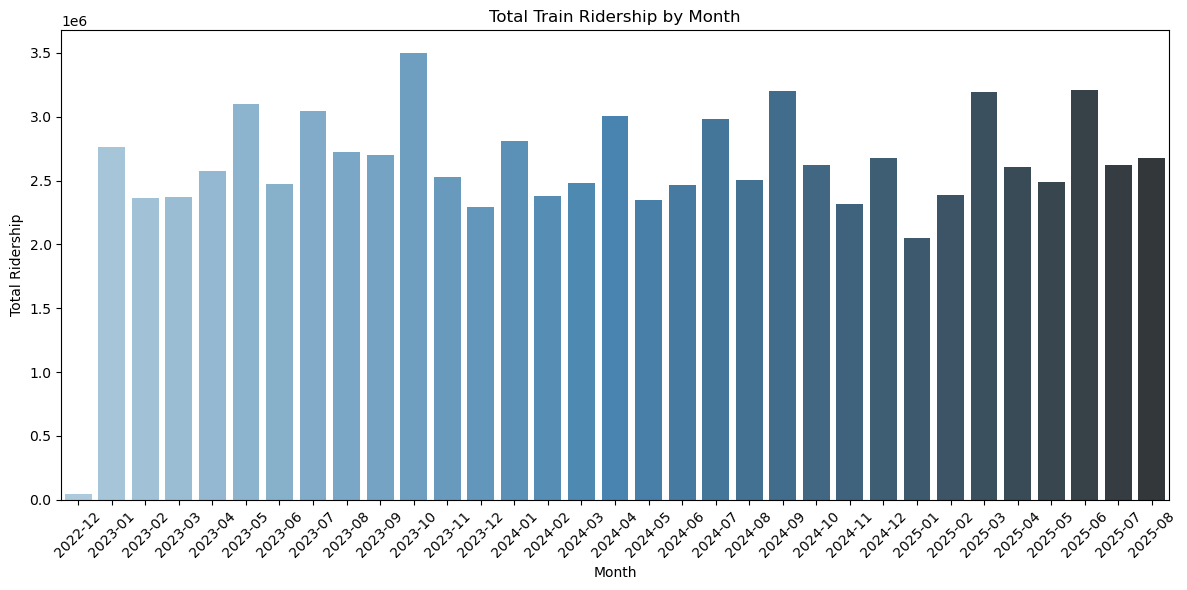

C:\Users\ngair\AppData\Local\Temp\ipykernel_8524\692582834.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_ridership.index,


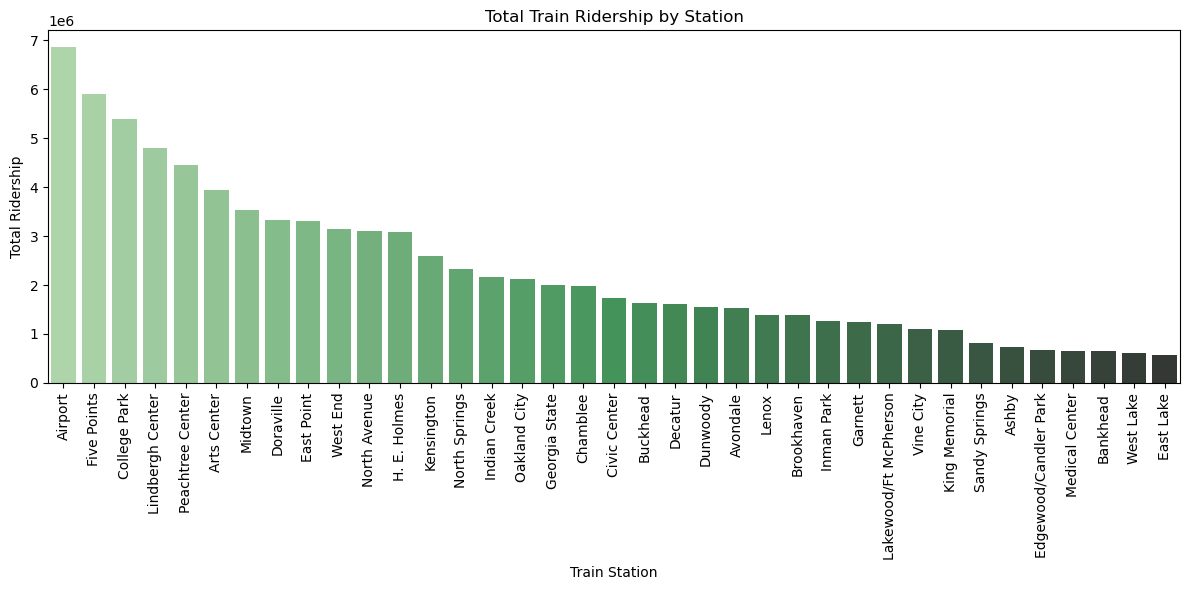

In [12]:
df = train_ridership.dropna(subset=['latitude', 'longitude']).copy()

# Step 3: Add month column for aggregation
df['month'] = df['week_start'].dt.to_period('M')

# Step 4: Barplot of ridership by month
monthly_ridership = df.groupby('month')['total trips'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_ridership['month'].astype(str),
            y=monthly_ridership['total trips'], palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Total Train Ridership by Month")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.tight_layout()
plt.show()

# Step 5: Plot ridership by train station
station_ridership = df.groupby('station')['total trips'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=station_ridership.index,
            y=station_ridership.values, palette="Greens_d")
plt.xticks(rotation=90)
plt.title("Total Train Ridership by Station")
plt.xlabel("Train Station")
plt.ylabel("Total Ridership")
plt.tight_layout()
plt.show()



In [29]:
import geopandas as gpd
from shapely.geometry import Point

# Create geometry points from long/lat
train_ridership["geometry"] = train_ridership.apply(
    lambda row: Point(row["longitude"], row["latitude"]), axis=1
)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    train_ridership,
    geometry="geometry",
    crs="EPSG:4326"   # WGS84 coordinate system
)


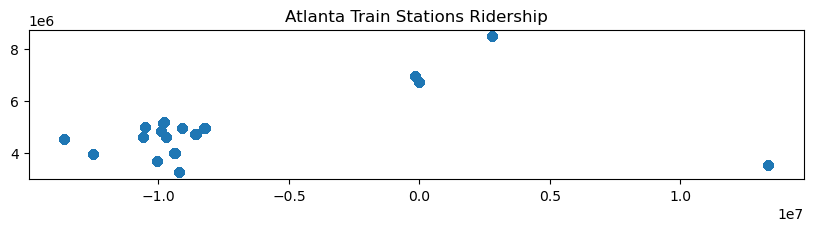

In [30]:
from shapely.geometry import box

gdf_web = gdf.to_crs(epsg=3857)

atl_bbox = gpd.GeoDataFrame(
    geometry=[box(-84.60, 33.65, -84.25, 33.85)],
    crs="EPSG:4326"
).to_crs(epsg=3857)
atl_bbox.plot(ax=gdf_web.plot(figsize=(10,10)), alpha=0)
plt.title("Atlanta Train Stations Ridership")
plt.show()

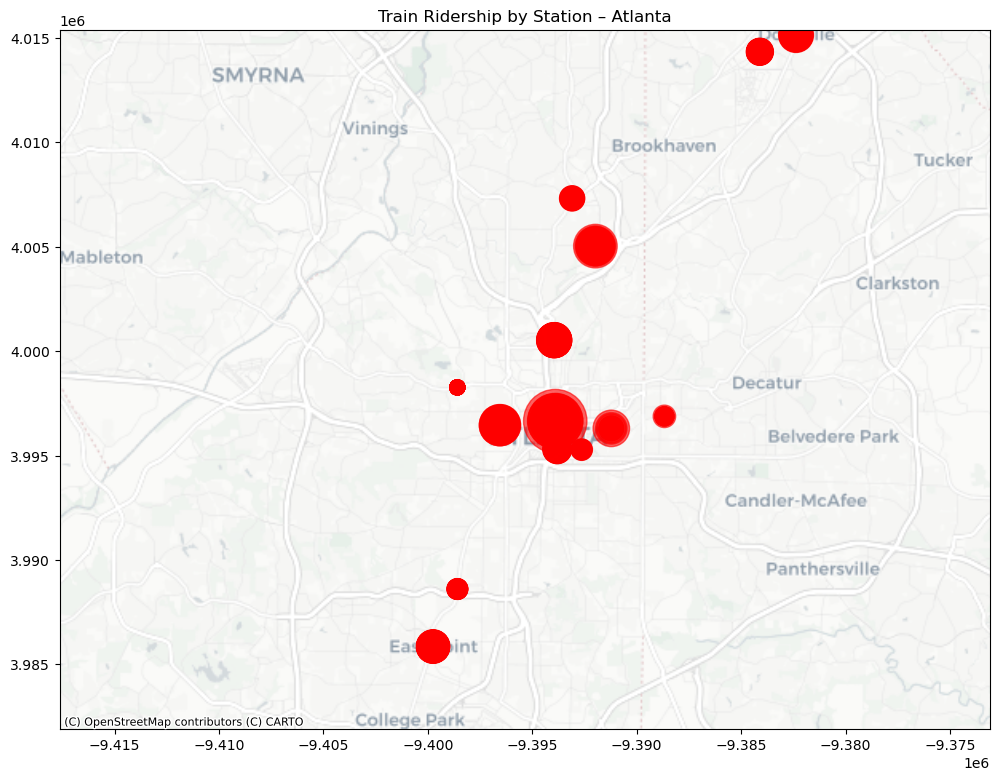

In [31]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import box

# Your geocoded GeoDataFrame
# gdf = GeoDataFrame with 'geometry' = Point(longitude, latitude), CRS = EPSG:4326

# Convert to web mercator
gdf_web = gdf.to_crs(epsg=3857)

# Define bounding box around Atlanta
atl_bbox = gpd.GeoDataFrame(
    geometry=[box(-84.60, 33.65, -84.20, 33.90)],
    crs="EPSG:4326"
).to_crs(3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Set map extent
ax.set_xlim(atl_bbox.total_bounds[0], atl_bbox.total_bounds[2])
ax.set_ylim(atl_bbox.total_bounds[1], atl_bbox.total_bounds[3])

# Plot the train stations
gdf_web.plot(
    ax=ax,
    markersize=gdf_web['total trips'] / 10,
    color='red',
    alpha=0.6
)

# Add a nice basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Train Ridership by Station – Atlanta")
plt.show()


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
# Features
X = df[['latitude', 'longitude']]

# Target
y = df['total trips']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Choose number of neighbors (k)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit model
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 791668.91
R^2 Score: 0.77


In [22]:
new_stations = pd.DataFrame({
    'latitude': [33.75, 33.80],
    'longitude': [-84.39, -84.35]
})
new_scaled = scaler.transform(new_stations)
pred_ridership = knn.predict(new_scaled)
print(pred_ridership)


[2872.  3994.2]


In [23]:
import pandas as pd

new_stations = pd.DataFrame({
    'latitude': [33.75, 33.80],
    'longitude': [-84.39, -84.35]
})

# Suppose you've already scaled and predicted
new_scaled = scaler.transform(new_stations)
pred_ridership = knn.predict(new_scaled)

# Combine input features and predictions
results = new_stations.copy()
results['predicted_ridership'] = pred_ridership
print(results)


   latitude  longitude  predicted_ridership
0     33.75     -84.39               2872.0
1     33.80     -84.35               3994.2


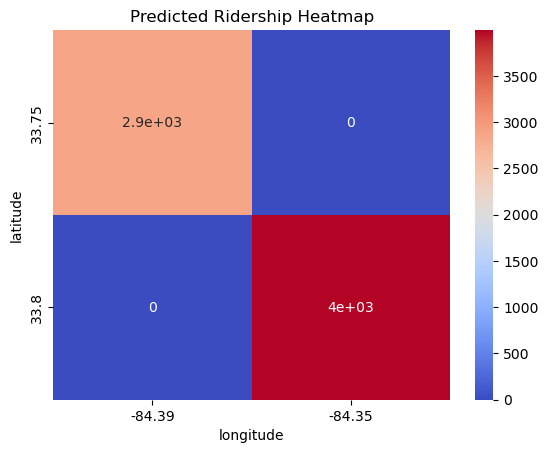

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

results['predicted_ridership'] = pred_ridership

# Create a pivot table for a grid-like view
pivot = results.pivot_table(index='latitude', columns='longitude', values='predicted_ridership', fill_value=0)

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Predicted Ridership Heatmap")
plt.show()


In [87]:
# Drop stations without valid geometry
gdf = gdf.dropna(subset=["geometry"])
print(gdf_4326_clean.geometry.isna().sum())  # should be 0


0


In [88]:
# Print stations with missing coordinates
missing = gdf[gdf['geometry'].isna() | gdf['latitude'].isna() | gdf['longitude'].isna()]
print(missing[['station', 'latitude', 'longitude']])



         station  latitude  longitude
11     Dome/GWCC       NaN        NaN
49     Dome/GWCC       NaN        NaN
87     Dome/GWCC       NaN        NaN
125    Dome/GWCC       NaN        NaN
163    Dome/GWCC       NaN        NaN
...          ...       ...        ...
36752  Dome/GWCC       NaN        NaN
36790  Dome/GWCC       NaN        NaN
36828  Dome/GWCC       NaN        NaN
36866  Dome/GWCC       NaN        NaN
36904  Dome/GWCC       NaN        NaN

[974 rows x 3 columns]


In [95]:
df = train_ridership

In [96]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your data (replace with your actual dataframe)
# df = pd.read_csv('your_data.csv')


# Extract date features
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month

# Encode 'Station' as integer
le = LabelEncoder()
df['station_encoded'] = le.fit_transform(df['Station'])

# Features and target
features = ['station_encoded', 'day_of_week', 'month', 'latitude', 'longitude']
X = df[features]
y = df['Total trips']

# Train-test split (random or time based)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


RMSE: 649.63
R^2: 0.87


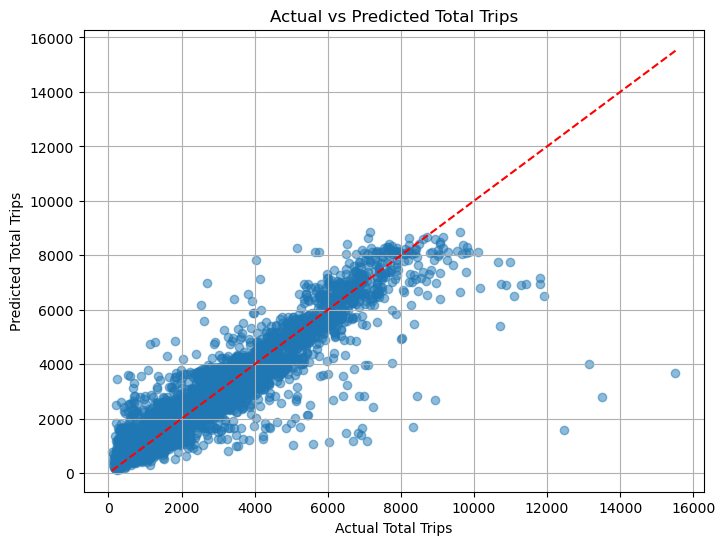

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual Total Trips")
plt.ylabel("Predicted Total Trips")
plt.title("Actual vs Predicted Total Trips")
plt.grid(True)
plt.show()


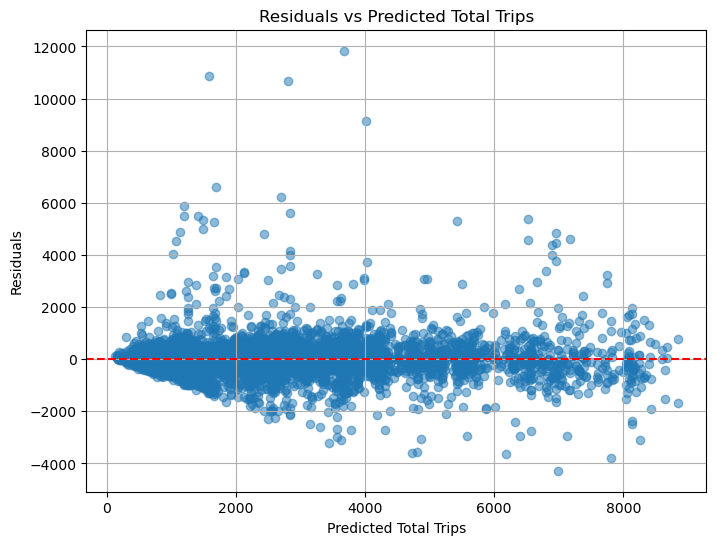

In [98]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Total Trips")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Total Trips")
plt.grid(True)
plt.show()


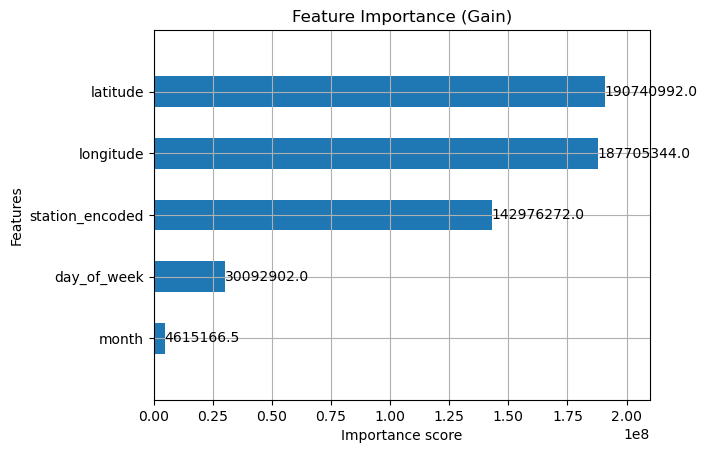

In [99]:
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10, height=0.5, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.show()


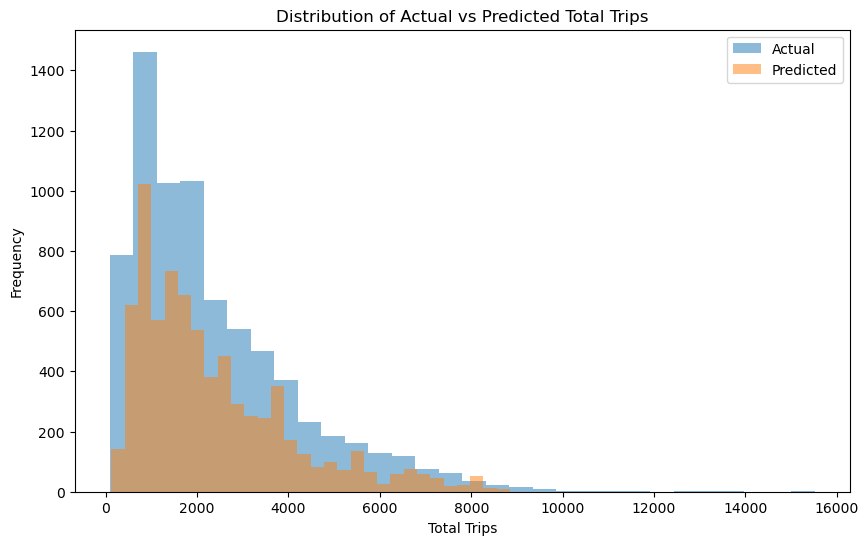

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted')
plt.xlabel("Total Trips")
plt.ylabel("Frequency")
plt.title("Distribution of Actual vs Predicted Total Trips")
plt.legend()
plt.show()


In [81]:
gdf_web

,date,station,total trips,week_start,latitude,longitude,geometry
0,2023-01-01,Airport,3998,2022-12-26,60.321816,24.947361,POINT (2777127.534 8471737.762)
1,2023-01-01,Arts Center,1564,2022-12-26,33.789136,-84.387264,POINT (-9393947.213 4000523.177)
2,2023-01-01,Ashby,726,2022-12-26,52.747134,-1.471215,POINT (-163774.882 6936360.914)
3,2023-01-01,Avondale,704,2022-12-26,33.435598,-112.349602,POINT (-12506700.485 3953266.035)
4,2023-01-01,Bankhead,323,2022-12-26,33.772257,-84.428941,POINT (-9398586.698 3998262.56)
...,...,...,...,...,...,...,...
36926,2025-08-31,Peachtree Center,13498,2025-08-25,33.760212,-84.386819,POINT (-9393897.698 3996649.609)
36927,2025-08-31,Sandy Springs,1155,2025-08-25,33.924269,-84.378538,POINT (-9392975.873 4018637.704)
36928,2025-08-31,Vine City,6402,2025-08-25,33.758748,-84.410607,POINT (-9396545.8 3996453.623)
36929,2025-08-31,West End,1802,2025-08-25,51.512899,-0.125597,POINT (-13981.439 6712526.003)


In [82]:
import folium
import numpy as np

# Center map roughly on your event data
center_lat = gdf_web.geometry.y.mean()
center_lon = gdf_web.geometry.x.mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles="CartoDB Positron")

# Normalize total trips for color scale
max_trips = gdf_web['total trips'].max()
min_trips = gdf_web['total trips'].min()

def trips_to_color(trips):
    # Map total_trips to color intensity (green = low, red = high)
    # Normalize trips between 0 and 1
    norm = (trips - min_trips) / (max_trips - min_trips) if max_trips != min_trips else 0
    r = int(255 * norm)
    g = int(255 * (1 - norm))
    b = 0
    return f"#{r:02x}{g:02x}{b:02x}"

# Add train stations circles colored by total trips
for _, row in gdf_web.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=7,
        color=trips_to_color(row['total trips']),
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"<b>station:</b> {row['station']}<br><b>total trips:</b> {row['total trips']}", max_width=250),
        tooltip=row['station']
    ).add_to(m)


m


ValueError: Location values cannot contain NaNs.